# Introduction au Machine Learning

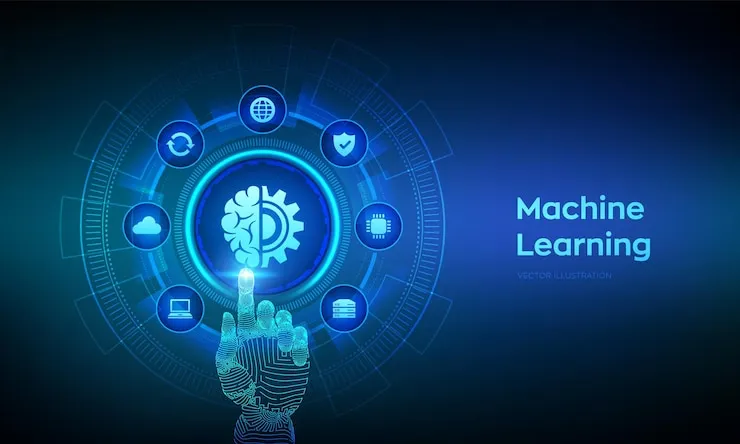

Le **machine learning** (ou **apprentissage automatique**) est une branche de l’intelligence artificielle (IA) qui permet à des **ordinateurs d’apprendre à partir des données**, sans être explicitement programmés pour chaque tâche.

---

## 📚 Définition simple

> Le machine learning consiste à **entraîner un modèle mathématique/statistique** à partir de **données**, afin qu’il puisse **faire des prédictions ou prendre des décisions** sur de nouvelles données **jamais vues**.

---

## 🎯 Objectif

> Apprendre un **modèle** à partir de données pour **généraliser** sur de nouveaux cas.

---

## 📦 Exemples concrets

| Application               | Description                                                       |
| ------------------------- | ----------------------------------------------------------------- |
| 📧 Filtrage d’e-mails     | Le modèle apprend à classer un mail en "spam" ou "non-spam"       |
| 🛒 Recommandation         | Apprendre ce que tu aimes pour proposer des produits/films        |
| 🏥 Diagnostic médical     | Prédire si une tumeur est bénigne ou maligne                      |
| 📈 Prédiction de prix     | Estimer le prix d’un logement en fonction de ses caractéristiques |
| 🎙️ Reconnaissance vocale | Transformer la voix en texte grâce à un modèle entraîné           |


# Types de Machine Learning

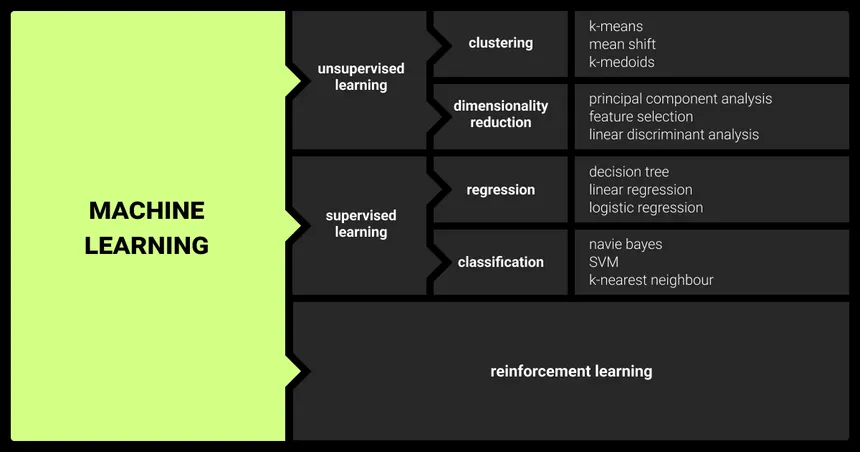

# Supervised Machine Learning

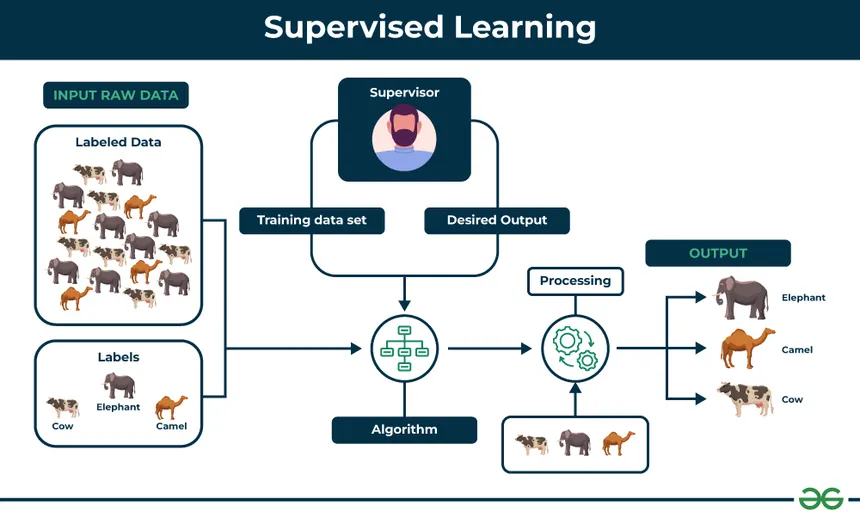
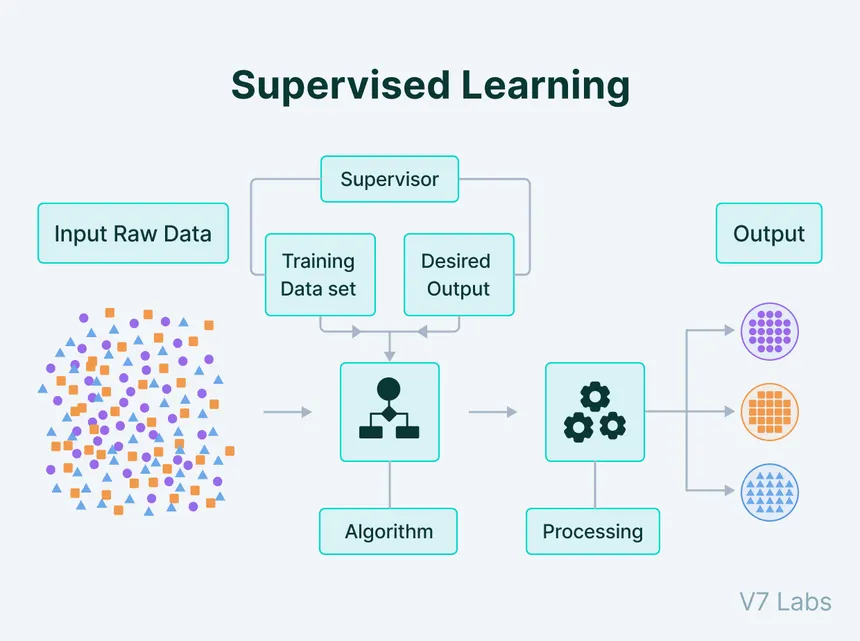

# Unsupervised Learning & Apprentissage Non Supervisé

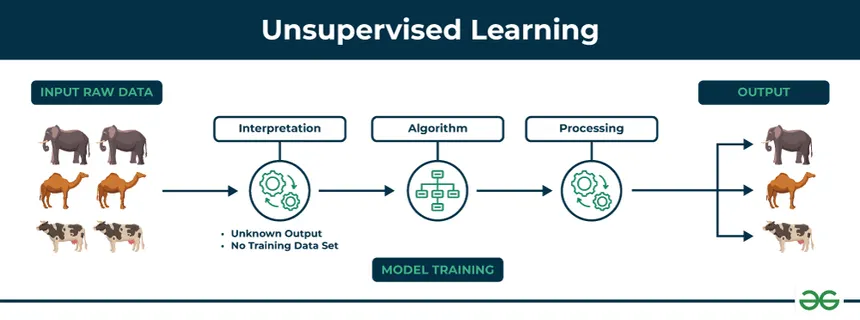
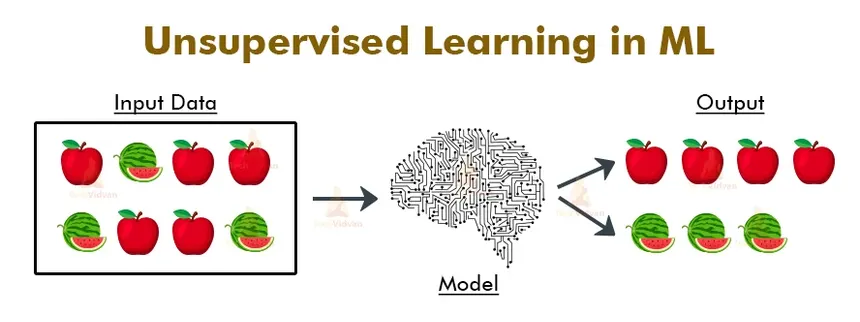
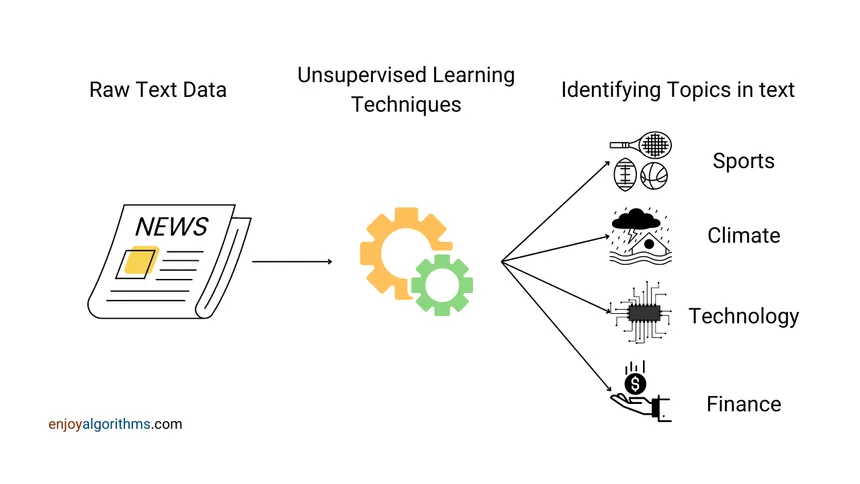

# Reinforcement Learning & Apprentissage par renforcement

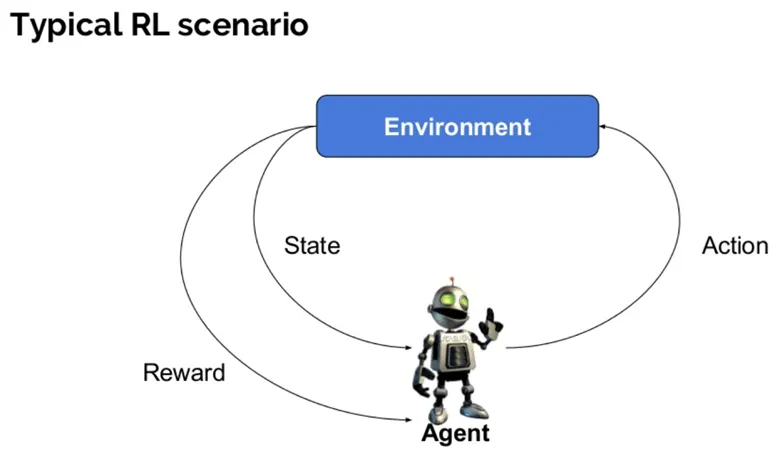
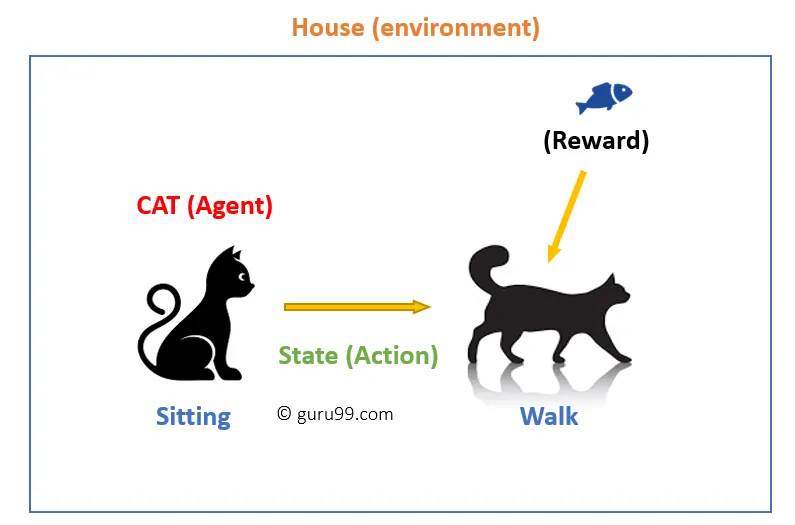

# Types de Machine Learning Supervisé

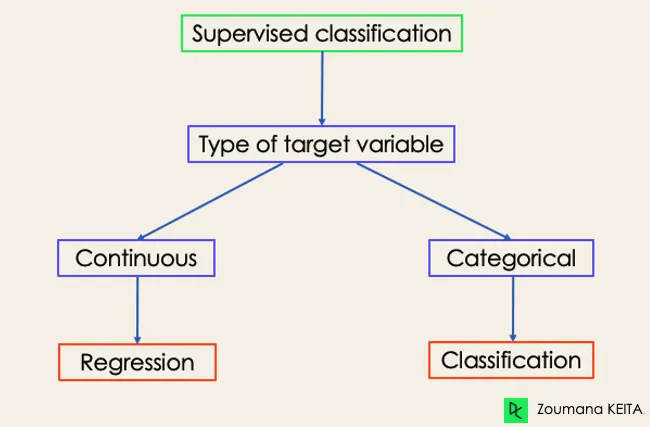

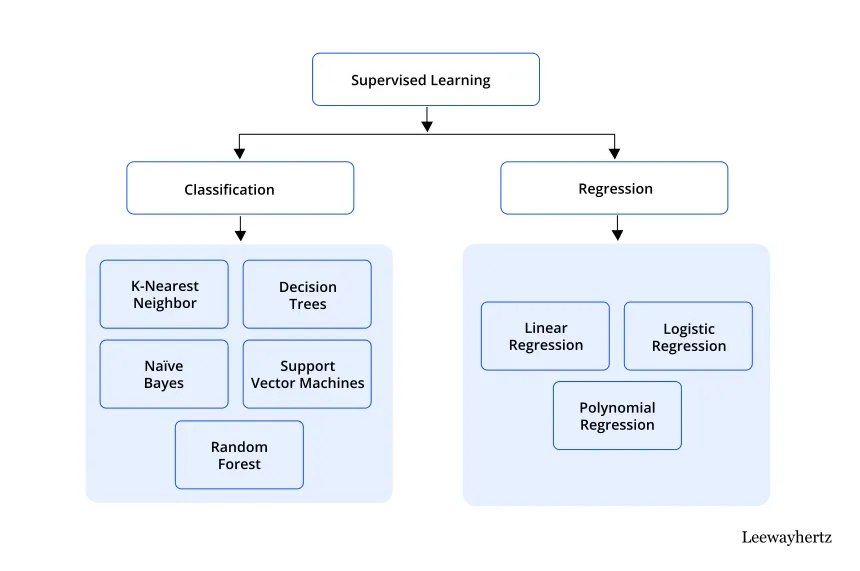


---

## ⚙️ Comment ça fonctionne ? (Les étapes clés)

1. **Collecte des données** (ex. : âge, poids, taille, sexe…)
2. **Prétraitement** (nettoyage, normalisation, encodage…)
3. **Choix du modèle** (linéaire, arbre, réseau de neurones, etc.)
4. **Entraînement** avec `.fit()` → le modèle apprend des relations dans les données
5. **Évaluation** avec `.score()` ou des métriques (MAE, RMSE, Accuracy…)
6. **Prédiction** avec `.predict()` sur de nouvelles données

---

## 🧠 Types d’apprentissage machine

| Type                 | Description                                                                                       | Exemples                           |
| -------------------- | ------------------------------------------------------------------------------------------------- | ---------------------------------- |
| **Supervisé**        | Le modèle apprend à partir de données **étiquetées** (input + output connus)                      | Régression, classification         |
| **Non supervisé**    | Le modèle découvre des **structures cachées** dans des données sans étiquette                     | Clustering, réduction de dimension |
| **Par renforcement** | Le modèle **interagit avec un environnement**, apprend par essais/erreurs (récompenses/punitions) | Jeux, robots, stratégie            |

---

## 📐 Exemple ultra simple : régression linéaire

Tu veux prédire la **taille** d’une personne à partir de son **poids**. Le modèle apprend une **droite** qui approxime cette relation :
`height ≈ a * weight + b`

Ensuite, pour un nouveau poids, il **prévoit** la taille.

---

## 📌 En résumé

| Terme                | Signification                                              |
| -------------------- | ---------------------------------------------------------- |
| **Machine Learning** | Apprentissage automatique à partir de données              |
| **Modèle**           | Fonction mathématique entraînée pour faire des prédictions |
| **Entraînement**     | Phase d’apprentissage du modèle                            |
| **Prédiction**       | Utilisation du modèle sur de nouvelles données             |
| **Généralisation**   | Capacité du modèle à bien prédire sur des cas jamais vus   |

---

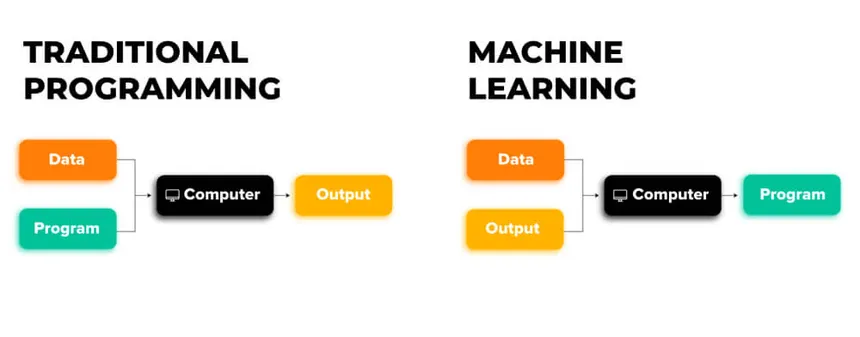

# Regression Lineaire 

## 🧱 1. Chargement des bibliothèques et des données

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lecture du fichier CSV
data = pd.read_csv("data/age_vs_weight_vs_height_vs_gender.csv")

# Aperçu des données
data.head()

,sex,age,height,weight,sort
0,f,147,59.5,101.0,14
1,m,160,59.3,78.5,93
2,f,148,59.0,95.0,61
3,m,149,57.0,92.0,63
4,m,156,61.5,108.5,28


## 📊 2. Analyse exploratoire

In [56]:
# Taille du dataset
print(f"Nombre de lignes : {data.shape[0]}, Nombre de colonnes : {data.shape[1]}")

display(data.info())
# Statistiques descriptives
display(data.describe())

Nombre de lignes : 237, Nombre de colonnes : 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sex     237 non-null    object 
 1   age     237 non-null    int64  
 2   height  237 non-null    float64
 3   weight  237 non-null    float64
 4   sort    237 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 9.4+ KB


None

,age,height,weight,sort
count,237.000000,237.000000,237.000000,237.000000
mean,164.430380,61.364557,101.308017,52.459916
std,18.425767,3.945402,19.440698,28.989541
min,139.000000,50.500000,50.500000,0.000000
25%,148.000000,58.800000,85.000000,28.000000
50%,163.000000,61.500000,101.000000,55.000000
75%,178.000000,64.300000,112.000000,75.000000
max,250.000000,72.000000,171.500000,99.000000


In [57]:
data.duplicated().sum()

0

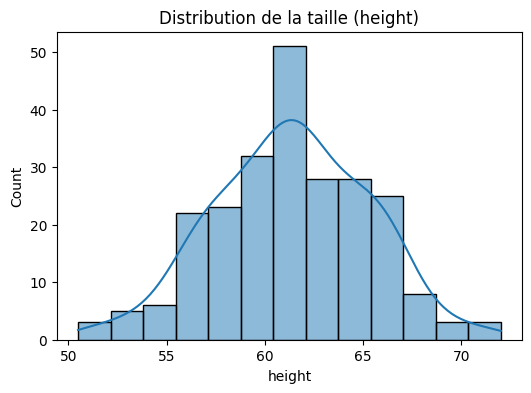

In [58]:
# Distribution de la variable cible
plt.figure(figsize=(6,4))
sns.histplot(data["height"], kde=True)
plt.title("Distribution de la taille (height)")
plt.show()

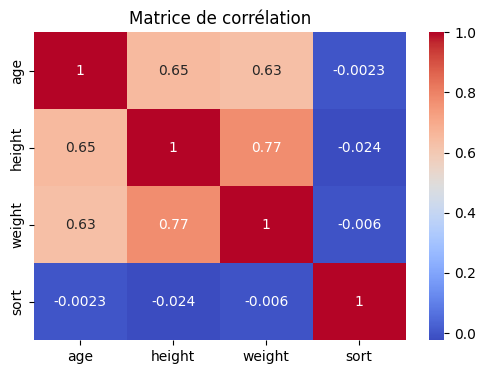

In [35]:
# Corrélation entre les variables numériques
data.drop(columns=["sex"])

plt.figure(figsize=(6,4))
sns.heatmap(data.drop(columns=["sex"]).corr(), annot=True, cmap="coolwarm")
plt.title("Matrice de corrélation")
plt.show()

## 🔄 3. Préparation des données

In [59]:
# Encodage binaire : f => 0, m => 1
data["sex"] = data["sex"].map({'f': 0, 'm': 1})
data["sex"].unique()

array([0, 1], dtype=int64)

In [60]:
X = data.drop(columns=["age", "sex", "height", "sort"])  # sort ne semble pas utile ici
Y = data["height"]

print(f"X shape: {X.shape}")
print(f"Y shape: {Y.shape}")

X shape: (237, 1)
Y shape: (237,)


## 👁️ 4. Visualisation 2D des relations

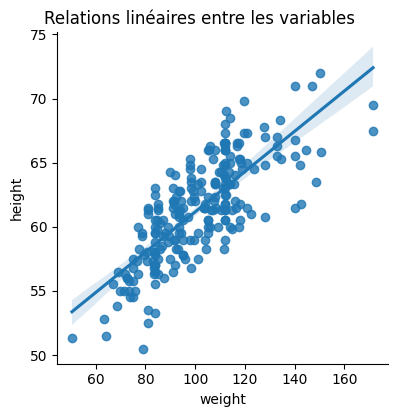

In [ ]:
# sns.pairplot(data, x_vars=["age", "weight", "sex"], y_vars="height", kind="reg", height=4
sns.pairplot(data, x_vars=["weight"], y_vars="height", kind="reg", height=4)
plt.suptitle("Relations linéaires entre les variables", y=1.02)
plt.show()

## 🤖 5. Régression linéaire simple (avec scikit-learn)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Séparer les données en train/test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


,weight
0,101.0
1,78.5
2,95.0
3,92.0
4,108.5


In [62]:
# Y.head()

In [41]:
# Création du modèle
model = LinearRegression()

# Entraînement avec .fit()
model.fit(X_train, y_train)

LinearRegression()

In [63]:
score = model.score(X_test, y_test)
score

0.36884787053658674

In [43]:
# Prédictions avec .predict()
y_pred = model.predict(X_test)
y_pred

array([57.42869115, 63.20214795, 61.38763295, 59.90302977, 60.97524318,
       62.95471408, 59.73807387, 64.1918834 , 63.20214795, 64.02692749,
       57.34621319, 56.27399979, 60.89276523, 60.31541955, 57.67612501,
       62.95471408, 67.82091339, 61.88250068, 61.63506681, 64.93418499,
       58.66586046, 62.54232431, 63.20214795, 63.69701567, 56.85134547,
       56.6039116 , 58.00603683, 57.42869115, 63.44958181, 62.21241249,
       58.58338251, 64.1918834 , 58.58338251, 62.54232431, 69.22303861,
       60.3978975 , 68.1508252 , 58.58338251, 58.50090455, 63.20214795,
       58.58338251, 60.15046364, 63.53205976, 58.58338251, 58.58338251,
       58.58338251, 58.74833841, 59.98550773])

## 📈 6. Visualisation des prédictions vs réels

In [64]:
# plt.figure(figsize=(6,6))
# plt.scatter(y_test, y_pred, alpha=0.7, color='teal')
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
# plt.xlabel("Valeurs réelles (height)")
# plt.ylabel("Valeurs prédites")
# plt.title("Prédictions vs Réalité")
# plt.grid(True)
# plt.show()

## 📊 7. Évaluation

In [73]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)*100

print(f"📉 MAE : {mae:.2f}")
print(f"📉 RMSE : {rmse:.2f}")
print(f"📈 R² Score : {r2:.4f}")
print(f"📈 MAPE : {mape:.4f}")


📉 MAE : 2.14
📉 RMSE : 2.66
📈 R² Score : 0.3688
📈 MAPE : 3.5223


Voici une version harmonisée, claire et pédagogique de ton texte, avec corrections et cohérence dans les valeurs et explications :

---

# Explication des principales métriques de performance en **régression** : **MAE**, **RMSE**, **R²** et **MAPE**

---

## 1. **MAE — Mean Absolute Error (Erreur absolue moyenne)**

### 🔹 Définition

Le MAE mesure **l’erreur moyenne absolue** entre les valeurs prédites et les valeurs réelles. Il correspond à l’**écart moyen** sans prendre en compte le signe des erreurs.

### 📐 Formule

$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} | y_i - \hat{y}_i |
$$

* $y_i$ : valeur réelle
* $\hat{y}_i$ : valeur prédite
* $n$ : nombre d’exemples

### 🧠 Interprétation

> 📉 **MAE = 2.14 cm**

→ En moyenne, le modèle se trompe de **2.14 cm** dans ses prédictions de taille.

✅ **Avantage** : très intuitif et interprétable dans l’unité de la variable cible.
⚠️ **Limite** : traite toutes les erreurs de façon égale, qu’elles soient petites ou grosses.

---

## 2. **RMSE — Root Mean Squared Error (Erreur quadratique moyenne racine)**

### 🔹 Définition

Le RMSE est la racine carrée de la moyenne des erreurs au carré. Il **pénalise davantage les grosses erreurs**, donnant plus de poids aux écarts importants.

### 📐 Formule

$$
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$$

### 🧠 Interprétation

> 📉 **RMSE = 2.66 cm**

→ En moyenne, les erreurs sont d’environ **2.66 cm**, avec une attention plus forte portée aux grosses erreurs.

✅ **Avantage** : sensible aux grosses erreurs, utile pour juger la fiabilité globale.
⚠️ **Limite** : moins intuitif que le MAE car il amplifie les erreurs importantes.

---

## 3. **R² — Coefficient de détermination**

### 🔹 Définition

Le **R²** mesure la part de la variance des données expliquée par le modèle. C’est une mesure relative qui compare la performance du modèle à celle d’un modèle naïf qui prédit toujours la moyenne.

### 📐 Formule

$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$

* $\bar{y}$ : moyenne des valeurs réelles
* Numérateur : erreur du modèle
* Dénominateur : erreur du modèle naïf (moyenne constante)

### 🧠 Interprétation

> 📈 **R² = 0.3688 (36.88%)**

→ Le modèle explique environ **36.88 %** de la variance des tailles des enfants.

🟢 **Positif** : le modèle capte une part utile de l’information.
🔴 **Limite** : beaucoup de variabilité reste inexpliquée (bruit, variables manquantes, etc.).

---

## 4. **MAPE — Mean Absolute Percentage Error (Erreur absolue moyenne en pourcentage)**

### 🔹 Définition

Le MAPE mesure l’erreur moyenne **en pourcentage** par rapport aux valeurs réelles, ce qui est utile pour comparer la performance sur des échelles différentes.

### 📐 Formule

$$
\text{MAPE} = \frac{100}{n} \sum_{i=1}^n \left| \frac{y_i - \hat{y}_i}{y_i} \right|
$$

### 🧠 Interprétation

> 📈 **MAPE = 3.688 %**

→ En moyenne, les prédictions s’écartent de **3.688 %** par rapport à la vraie valeur.

✅ **Avantage** : très intuitif, on comprend directement la marge d’erreur relative.
⚠️ **Limite** : très sensible aux petites valeurs réelles (division par des nombres proches de zéro).

---

## 📊 Résumé des métriques

| Métrique | Valeur  | Interprétation concrète                                          |
| -------- | ------- | ---------------------------------------------------------------- |
| **MAE**  | 2.14 cm | Écart moyen absolu entre prédictions et réalité                  |
| **RMSE** | 2.66 cm | Écart moyen pondéré, plus sensible aux grosses erreurs           |
| **R²**   | 36.88 % | Part de la variance expliquée par le modèle                      |
| **MAPE** | 3.688 % | Écart moyen relatif en pourcentage par rapport à la vraie valeur |

---

## 🧭 Que faire avec ces résultats ?

* Le modèle n’est **pas catastrophique**, mais avec moins de 40 % de variance expliquée, il reste **améliorable**.
* La MAPE élevée suggère que les erreurs relatives restent importantes.
* Actions recommandées pour améliorer le modèle :

  * Ajouter des **variables explicatives** pertinentes (feature engineering).
  * Tester des **modèles non linéaires** (Random Forest, XGBoost, SVR, etc.).
  * Vérifier la **qualité des données** (bruit, erreurs, valeurs aberrantes).


## 🧠 8. Interprétation des coefficients

In [79]:
coeffs = pd.DataFrame({
    "Variable": X.columns,
    "Coefficient": model.coef_
})
print("Importance des variables dans le modèle :")
display(coeffs)

Importance des variables dans le modèle :


,Variable,Coefficient
0,weight,0.164956


- f(x) = ax
- y = height = 0.164956*weight

## Récapitulatif

| Étape                | Fonction utilisée            |
| -------------------- | ---------------------------- |
| Chargement modèle    | `LinearRegression()`         |
| Entraînement         | `.fit(X_train, y_train)`     |
| Prédiction           | `.predict(X_test)`           |
| Score de performance | `.score(X_test, y_test)`     |
| Erreurs MAE/RMSE/R²  | `mean_absolute_error()` etc. |


# Régression Linéaire Multiple & Cross Validation

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [80]:
# =============================================================================
# 1. CHARGEMENT ET PRÉPARATION DES DONNÉES
# =============================================================================
print("🔍 ÉTAPE 1: Chargement et exploration des données")
print("=" * 50)

# Lecture du fichier CSV
data = pd.read_csv("data/age_vs_weight_vs_height_vs_gender.csv")

# Aperçu des données
print("Aperçu des premières lignes :")
display(data.head())
print(f"\nDimensions du dataset : {data.shape}")
print(f"Colonnes : {list(data.columns)}")

# Encodage binaire : f => 0, m => 1
data["sex"] = data["sex"].map({'f': 0, 'm': 1})
print(f"Valeurs uniques pour 'sex' après encodage : {data['sex'].unique()}")

# Préparation des variables
X = data.drop(columns=["height", "sort"])  # Variables explicatives
Y = data["height"]  # Variable cible

print(f"\n📊 Dimensions finales :")
print(f"X (variables explicatives) : {X.shape}")
print(f"Y (variable cible) : {Y.shape}")


🔍 ÉTAPE 1: Chargement et exploration des données
Aperçu des premières lignes :


,sex,age,height,weight,sort
0,f,147,59.5,101.0,14
1,m,160,59.3,78.5,93
2,f,148,59.0,95.0,61
3,m,149,57.0,92.0,63
4,m,156,61.5,108.5,28



Dimensions du dataset : (237, 5)
Colonnes : ['sex', 'age', 'height', 'weight', 'sort']
Valeurs uniques pour 'sex' après encodage : [0 1]

📊 Dimensions finales :
X (variables explicatives) : (237, 3)
Y (variable cible) : (237,)



🎨 ÉTAPE 2: Visualisation des relations


<Figure size 1500x500 with 0 Axes>

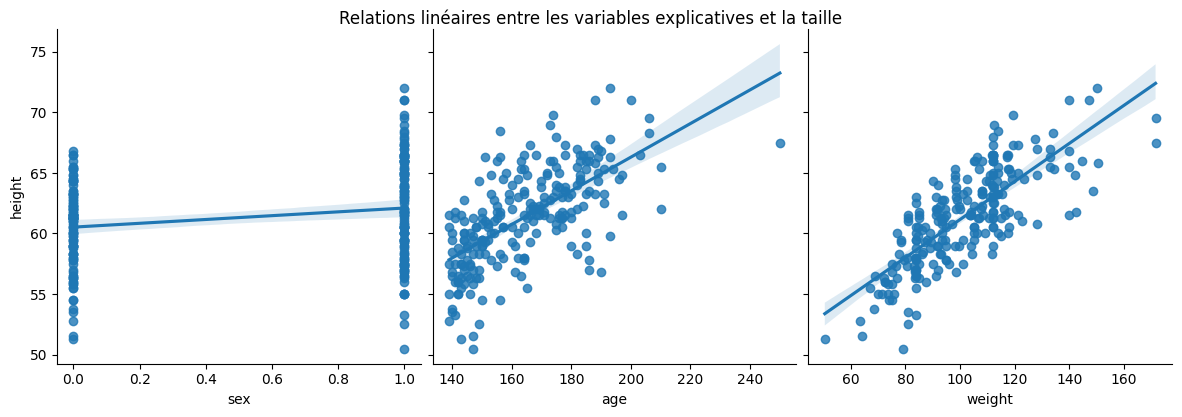

In [81]:
# =============================================================================
# 2. VISUALISATION DES RELATIONS
# =============================================================================
print("\n🎨 ÉTAPE 2: Visualisation des relations")
print("=" * 50)

plt.figure(figsize=(15, 5))
sns.pairplot(data, x_vars=["sex", "age", "weight"], y_vars="height", kind="reg", height=4)
plt.suptitle("Relations linéaires entre les variables explicatives et la taille", y=1.02)
plt.show()


In [76]:
# =============================================================================
# 3. APPROCHE TRADITIONNELLE : TRAIN/TEST SPLIT
# =============================================================================
print("\n🚂 ÉTAPE 3: Approche traditionnelle (Train/Test Split)")
print("=" * 50)

# Division train/test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Entraînement du modèle
model_simple = LinearRegression()
model_simple.fit(X_train, y_train)

# Prédictions
y_pred_simple = model_simple.predict(X_test)

# Évaluation
mae_simple = mean_absolute_error(y_test, y_pred_simple)
rmse_simple = np.sqrt(mean_squared_error(y_test, y_pred_simple))
r2_simple = r2_score(y_test, y_pred_simple)


print(f"📈 Résultats avec Train/Test Split (80/20) :")
print(f"   MAE  : {mae_simple:.2f} cm")
print(f"   RMSE : {rmse_simple:.2f} cm")
print(f"   R²   : {r2_simple:.4f}")
print(f"📈 MAPE : {mape:.4f}")



🚂 ÉTAPE 3: Approche traditionnelle (Train/Test Split)
📈 Résultats avec Train/Test Split (80/20) :
   MAE  : 2.14 cm
   RMSE : 2.66 cm
   R²   : 0.3688
📈 MAPE : 3.5223


### Cross Validation

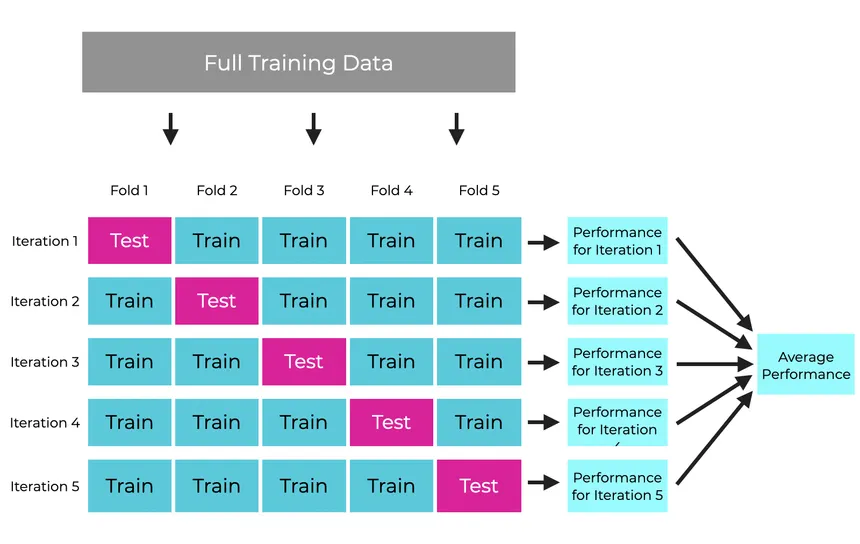

In [82]:
# =============================================================================
# 4. VALIDATION CROISÉE 
# =============================================================================
print("\n🔄 ÉTAPE 4: Validation croisée (K-Fold)")
print("=" * 50)

# Modèle pour la validation croisée
model_cv = LinearRegression()

# Validation croisée avec différentes métriques
print("🎯 Validation croisée avec 5 plis (K=5) :")

# R² Score avec validation croisée
r2_scores = cross_val_score(model_cv, X, Y, cv=5, scoring='r2')
print(f"   R² par pli : {[f'{score:.4f}' for score in r2_scores]}")
print(f"   R² moyen   : {r2_scores.mean():.4f} (±{r2_scores.std():.4f})")

# MAE avec validation croisée
mae_scores = cross_val_score(model_cv, X, Y, cv=5, scoring='neg_mean_absolute_error')
mae_scores = -mae_scores  # Conversion en valeurs positives
print(f"   MAE par pli : {[f'{score:.2f}' for score in mae_scores]}")
print(f"   MAE moyen   : {mae_scores.mean():.2f} (±{mae_scores.std():.2f}) cm")

# RMSE avec validation croisée
rmse_scores = cross_val_score(model_cv, X, Y, cv=5, scoring='neg_root_mean_squared_error')
rmse_scores = -rmse_scores  # Conversion en valeurs positives
print(f"   RMSE par pli : {[f'{score:.2f}' for score in rmse_scores]}")
print(f"   RMSE moyen   : {rmse_scores.mean():.2f} (±{rmse_scores.std():.2f}) cm")



🔄 ÉTAPE 4: Validation croisée (K-Fold)
🎯 Validation croisée avec 5 plis (K=5) :
   R² par pli : ['0.5486', '0.5894', '0.6875', '0.6251', '0.7734']
   R² moyen   : 0.6448 (±0.0788)
   MAE par pli : ['2.01', '1.88', '1.90', '1.89', '1.46']
   MAE moyen   : 1.83 (±0.19) cm
   RMSE par pli : ['2.71', '2.38', '2.32', '2.30', '1.79']
   RMSE moyen   : 2.30 (±0.30) cm


In [83]:
# =============================================================================
# 5. VALIDATION CROISÉE COMPLÈTE AVEC CROSS_VALIDATE
# =============================================================================
print("\n📊 ÉTAPE 5: Validation croisée complète")
print("=" * 50)

# Utilisation de cross_validate pour obtenir plusieurs métriques simultanément
scoring = ['r2', 'neg_mean_absolute_error', 'neg_root_mean_squared_error']
cv_results = cross_validate(model_cv, X, Y, cv=5, scoring=scoring, return_train_score=True)

print("🔍 Résultats détaillés de la validation croisée :")
print("\nScores de test (validation) :")
for metric in scoring:
    scores = cv_results[f'test_{metric}']
    if 'neg_' in metric:
        scores = -scores  # Conversion en valeurs positives
        metric_name = metric.replace('neg_', '').replace('_', ' ').upper()
    else:
        metric_name = metric.upper()
    
    print(f"   {metric_name:4s} : {scores.mean():.4f} (±{scores.std():.4f})")

print("\nScores d'entraînement :")
for metric in scoring:
    scores = cv_results[f'train_{metric}']
    if 'neg_' in metric:
        scores = -scores
        metric_name = metric.replace('neg_', '').replace('_', ' ').upper()
    else:
        metric_name = metric.upper()
    
    print(f"   {metric_name:4s} : {scores.mean():.4f} (±{scores.std():.4f})")



📊 ÉTAPE 5: Validation croisée complète
🔍 Résultats détaillés de la validation croisée :

Scores de test (validation) :
   R2   : 0.6448 (±0.0788)
   MEAN ABSOLUTE ERROR : 1.8273 (±0.1890)
   ROOT MEAN SQUARED ERROR : 2.3015 (±0.2951)

Scores d'entraînement :
   R2   : 0.6587 (±0.0196)
   MEAN ABSOLUTE ERROR : 1.8249 (±0.0511)
   ROOT MEAN SQUARED ERROR : 2.2970 (±0.0699)


# Model Selection

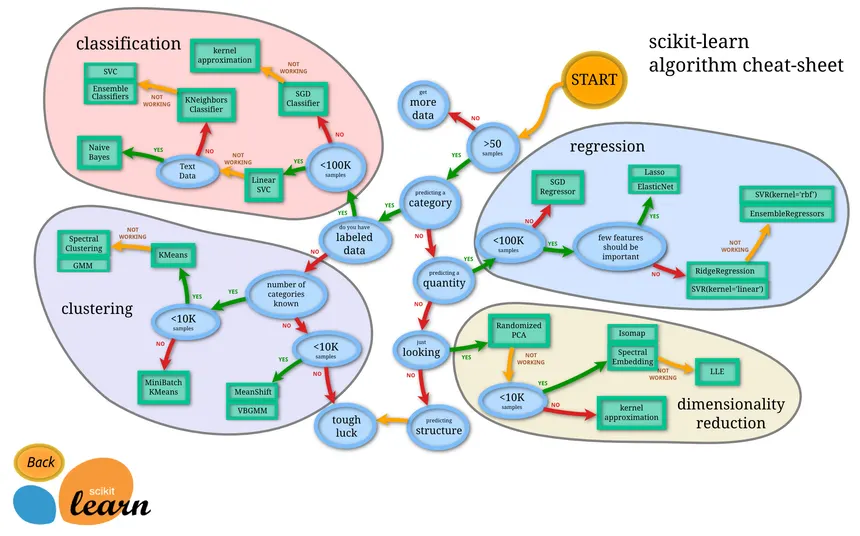

# Hyperparametrage avec Validation_curve et GridsearchCV

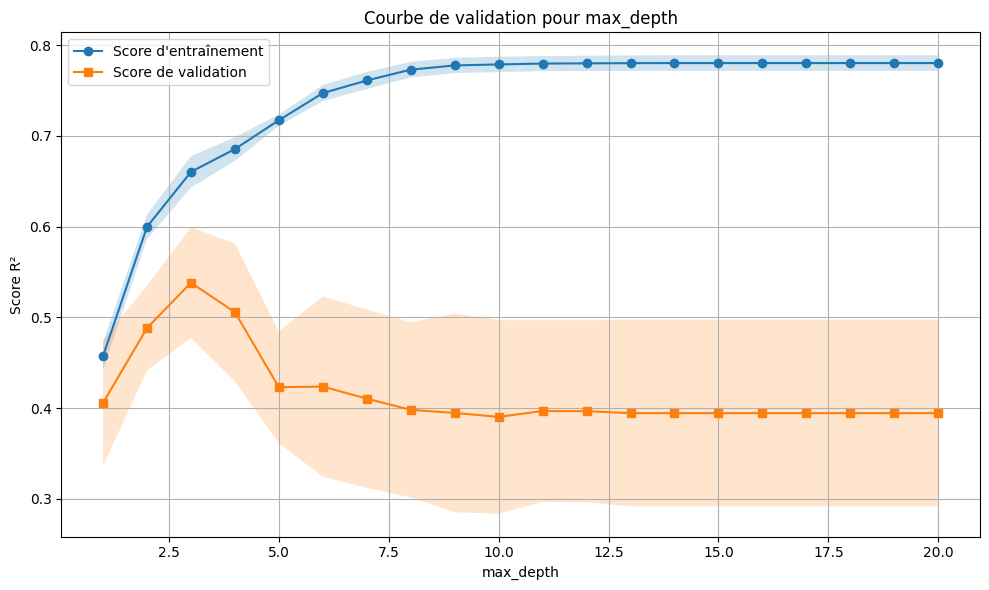

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve

# Exemple : pour un modèle type arbre
param_name = 'max_depth'
param_range = np.arange(1, 21)  # de 1 à 20

train_scores, test_scores = validation_curve(
    model_cv, X, Y,
    param_name=param_name,
    param_range=param_range,
    scoring='r2',  # ou 'neg_mean_absolute_error' selon le besoin
    cv=5,
    n_jobs=-1
)

# Moyenne et écart-type pour chaque valeur de l'hyperparamètre
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# 📈 Tracé
plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, label="Score d'entraînement", marker='o')
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.2)

plt.plot(param_range, test_mean, label="Score de validation", marker='s')
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.2)

plt.title(f"Courbe de validation pour {param_name}")
plt.xlabel(param_name)
plt.ylabel("Score R²")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()


# Learning_curve()


📈 Courbe d'apprentissage


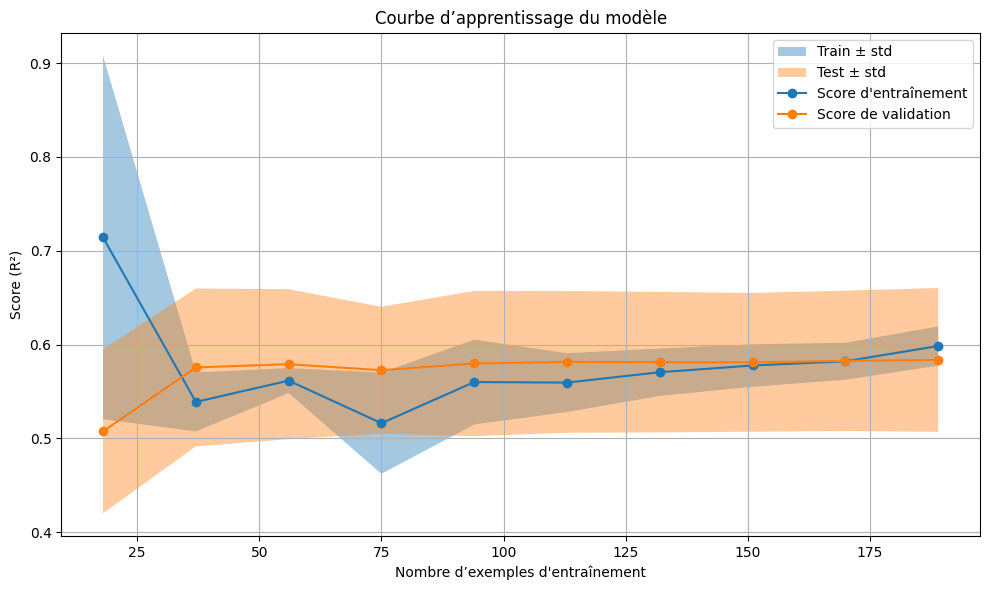

In [54]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

print("\n📈 Courbe d'apprentissage")
print("=" * 50)

# Choisir la métrique principale (ex: 'r2')
scoring = 'r2'

train_sizes, train_scores, test_scores = learning_curve(
    model_cv,
    X, Y,
    cv=5,
    scoring=scoring,
    train_sizes=np.linspace(0.1, 1.0, 10),
    return_times=False,
    n_jobs=-1
)

# Moyenne et écart-type
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# 📊 Tracé de la courbe
plt.figure(figsize=(10, 6))
plt.title("Courbe d’apprentissage du modèle")
plt.xlabel("Nombre d’exemples d'entraînement")
plt.ylabel("Score (R²)")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.4, label="Train ± std")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.4, label="Test ± std")

plt.plot(train_sizes, train_scores_mean, 'o-', label="Score d'entraînement")
plt.plot(train_sizes, test_scores_mean, 'o-', label="Score de validation")

plt.legend(loc="best")
plt.tight_layout()
plt.show()


In [21]:
# =============================================================================
# 6. COMPARAISON ET ANALYSE
# =============================================================================
print("\n⚖️ ÉTAPE 6: Comparaison des approches")
print("=" * 50)

print("📈 COMPARAISON DES RÉSULTATS :")
print(f"{'Méthode':<25} {'R²':<10} {'MAE (cm)':<12} {'RMSE (cm)':<12}")
print("-" * 60)
print(f"{'Train/Test Split':<25} {r2_simple:<10.4f} {mae_simple:<12.2f} {rmse_simple:<12.2f}")
print(f"{'Validation Croisée':<25} {r2_scores.mean():<10.4f} {mae_scores.mean():<12.2f} {rmse_scores.mean():<12.2f}")



⚖️ ÉTAPE 6: Comparaison des approches
📈 COMPARAISON DES RÉSULTATS :
Méthode                   R²         MAE (cm)     RMSE (cm)   
------------------------------------------------------------
Train/Test Split          0.4411     2.06         2.50        
Validation Croisée        0.6448     1.83         2.30        


In [ ]:
# =============================================================================
# 7 MODÈLE FINAL ET COEFFICIENTS
# =============================================================================
print("\n🎯 ÉTAPE 8: Modèle final")
print("=" * 50)

# Entraînement sur toutes les données pour le modèle final
model_final = LinearRegression()
model_final.fit(X, Y)

print("📋 Coefficients du modèle final :")
feature_names = X.columns
coefficients = model_final.coef_
intercept = model_final.intercept_

print(f"   Ordonnée à l'origine : {intercept:.2f} cm")
for feature, coef in zip(feature_names, coefficients):
    print(f"   {feature:<8s} : {coef:>8.2f} cm")

print(f"\n🔍 Interprétation :")
print(f"   - Une différence de sexe (m vs f) change la taille de {coefficients[0]:.1f} cm")
print(f"   - Chaque année d'âge change la taille de {coefficients[1]:.2f} cm")
print(f"   - Chaque kg de poids change la taille de {coefficients[2]:.2f} cm")



🎯 ÉTAPE 8: Modèle final
📋 Coefficients du modèle final :
   Ordonnée à l'origine : 39.01 cm
   sex      :     1.03 cm
   age      :     0.06 cm
   weight   :     0.12 cm

🔍 Interprétation :
   - Une différence de sexe (m vs f) change la taille de 1.0 cm
   - Chaque année d'âge change la taille de 0.06 cm
   - Chaque kg de poids change la taille de 0.12 cm


**height = 1.03*sex + 0.06*age + 0.12*weight + 39.01**

In [24]:
# =============================================================================
# 9. POURQUOI LA VALIDATION CROISÉE EST IMPORTANTE
# =============================================================================
print("\n💡 ÉTAPE 9: Pourquoi utiliser la validation croisée ?")
print("=" * 50)

print("""
🎯 AVANTAGES DE LA VALIDATION CROISÉE :

1. **Utilisation optimale des données** :
   - Toutes les données servent à la fois pour l'entraînement ET la validation
   - Pas de "gaspillage" de données dans un seul ensemble de test

2. **Estimation plus robuste des performances** :
   - Moyenne sur plusieurs divisions différentes des données
   - Estimation de la variabilité des performances (écart-type)

3. **Détection du surapprentissage** :
   - Comparaison entre scores d'entraînement et de validation
   - Grande différence = possible surapprentissage

4. **Confiance dans les résultats** :
   - Intervalle de confiance grâce à l'écart-type
   - Performances moins dépendantes d'une division particulière

📊 Dans notre cas :
   - Le modèle est stable (faible écart-type)
   - Pas de surapprentissage apparent
   - Performance cohérente sur différents sous-ensembles
""")


💡 ÉTAPE 9: Pourquoi utiliser la validation croisée ?

🎯 AVANTAGES DE LA VALIDATION CROISÉE :

1. **Utilisation optimale des données** :
   - Toutes les données servent à la fois pour l'entraînement ET la validation
   - Pas de "gaspillage" de données dans un seul ensemble de test

2. **Estimation plus robuste des performances** :
   - Moyenne sur plusieurs divisions différentes des données
   - Estimation de la variabilité des performances (écart-type)

3. **Détection du surapprentissage** :
   - Comparaison entre scores d'entraînement et de validation
   - Grande différence = possible surapprentissage

4. **Confiance dans les résultats** :
   - Intervalle de confiance grâce à l'écart-type
   - Performances moins dépendantes d'une division particulière

📊 Dans notre cas :
   - Le modèle est stable (faible écart-type)
   - Pas de surapprentissage apparent
   - Performance cohérente sur différents sous-ensembles



# 🧠 Modèle + prédictions en validation croisée

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


model = LinearRegression()
y_pred = cross_val_predict(model, X, Y, cv=5)

# Calcul des métriques
mae = mean_absolute_error(Y, y_pred)
rmse = mean_squared_error(Y, y_pred)
r2 = r2_score(Y, y_pred)

print(f"📉 MAE : {mae:.2f}")
print(f"📉 RMSE : {rmse:.2f}")
print(f"📈 R² : {r2:.4f}")

📉 MAE : 1.83
📉 RMSE : 5.39
📈 R² : 0.6520


# 📈 1. Courbe des valeurs réelles vs. prédictions

In [47]:
# plt.figure(figsize=(6,6))
# sns.scatterplot(x=Y, y=y_pred, alpha=0.7, color='teal')
# plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], '--r')  # diagonale idéale
# plt.xlabel("Valeurs réelles (height)")
# plt.ylabel("Prédictions (height)")
# plt.title("📊 Prédictions vs Valeurs réelles")
# plt.grid(True)
# plt.show()

➡️ Cette courbe montre à quel point les prédictions sont proches de la réalité.
Si les points sont proches de la diagonale rouge, le modèle est bon.

# 📉 2. Graphique des résidus (erreurs)

In [45]:
# residuals = Y - y_pred

# plt.figure(figsize=(6,4))
# sns.histplot(residuals, kde=True, color='orange', bins=30)
# plt.axvline(0, color='black', linestyle='--')
# plt.title("📉 Distribution des résidus")
# plt.xlabel("Erreur de prédiction (résidu)")
# plt.ylabel("Fréquence")
# plt.grid(True)
# plt.show()


➡️ Ce graphique montre comment les erreurs sont réparties.
Un bon modèle aura des résidus centrés autour de 0 et une forme en cloche (distribution normale).

# 📉 3. Valeur prédite vs Résidu (homoscédasticité)

In [46]:
# plt.figure(figsize=(6,4))
# sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
# plt.axhline(0, color='red', linestyle='--')
# plt.xlabel("Valeur prédite")
# plt.ylabel("Résidu")
# plt.title("🔍 Résidus vs Prédictions")
# plt.grid(True)
# plt.show()


➡️ Ce plot permet de voir s’il y a un biais systématique.
Les résidus devraient être répartis de manière aléatoire autour de 0. Si tu observes une forme (courbe, entonnoir...), le modèle ne capture pas bien la structure des données.

# Vocabulaire

---

## 📌 1. **Concepts fondamentaux**

| Terme                              | Définition                                                                                                |
| ---------------------------------- | --------------------------------------------------------------------------------------------------------- |
| **Apprentissage supervisé**        | Type d’apprentissage où l’on entraîne un modèle à partir de données étiquetées (avec des cibles connues). |
| **Régression**                     | Tâche supervisée où la **variable cible (target)** est **continue** (ex : prix, température, etc.).       |
| **Observation / Exemple**          | Une ligne de données (souvent appelée un **échantillon** ou **sample**).                                  |
| **Feature (variable explicative)** | Une colonne de données utilisée pour prédire (X).                                                         |
| **Target / Label**                 | La variable à prédire (Y).                                                                                |
| **Modèle**                         | Fonction entraînée pour faire une prédiction à partir de X.                                               |
| **Fonction d'hypothèse**           | Fonction mathématique approximant la relation entre X et Y.                                               |
| **Apprentissage**                  | Processus d’ajustement des **paramètres du modèle** pour minimiser l’erreur.                              |

---

## ⚙️ 2. **Évaluation des performances (Régression)**

| Terme                                 | Définition                                                                       |
| ------------------------------------- | -------------------------------------------------------------------------------- |
| **MAE (Mean Absolute Error)**         | Moyenne des erreurs absolues.                                                    |
| **MSE (Mean Squared Error)**          | Moyenne des erreurs au carré.                                                    |
| **RMSE (Root Mean Squared Error)**    | Racine carrée du MSE.                                                            |
| **R² (coefficient de détermination)** | Mesure la proportion de la variance expliquée par le modèle.                     |
| **Erreur**                            | Différence entre la **prédiction** et la **valeur réelle**.                      |
| **Biais**                             | Erreur due à des hypothèses trop simples du modèle.                              |
| **Variance**                          | Erreur due à une forte sensibilité aux fluctuations des données.                 |
| **Underfitting**                      | Modèle trop simple, faible performance entraînement/test.                        |
| **Overfitting**                       | Modèle trop complexe, excellente perf entraînement mais mauvaise généralisation. |

---

## 🔁 3. **Validation du modèle**

| Terme                                     | Définition                                                              |
| ----------------------------------------- | ----------------------------------------------------------------------- |
| **Train/test split**                      | Séparation du dataset en données d’entraînement et de test.             |
| **Validation croisée (cross-validation)** | Technique pour évaluer un modèle sur plusieurs splits de données.       |
| **K-Fold CV**                             | Diviser le dataset en `k` parties, entraînement sur k-1, test sur 1.    |
| **ShuffleSplit / StratifiedKFold**        | Variantes de la validation croisée.                                     |
| **Métrique de scoring**                   | Fonction utilisée pour évaluer la performance (ex : r2, neg MAE, etc.). |

---

## 🧠 4. **Modèles classiques de régression**

| Terme                               | Définition                                                        |
| ----------------------------------- | ----------------------------------------------------------------- |
| **Régression linéaire**             | Modèle simple où Y = aX + b.                                      |
| **Ridge Regression**                | Régression linéaire + régularisation L2.                          |
| **Lasso Regression**                | Régression linéaire + régularisation L1 (sélection de variables). |
| **ElasticNet**                      | Combinaison de L1 et L2.                                          |
| **Régression polynomiale**          | Ajoute des termes non linéaires (ex: x², x³…).                    |
| **SVR (Support Vector Regression)** | Variante de SVM pour la régression.                               |
| **Random Forest Regressor**         | Ensemble de plusieurs arbres de décision.                         |
| **Gradient Boosting Regressor**     | Méthode d’ensemble optimisée.                                     |
| **XGBoost / LightGBM / CatBoost**   | Algorithmes de boosting très performants.                         |

---

## 🔬 5. **Prétraitement & Feature Engineering**

| Terme                  | Définition                                                  |
| ---------------------- | ----------------------------------------------------------- |
| **Standardisation**    | Mettre les données à échelle moyenne 0, écart-type 1.       |
| **Normalisation**      | Mise à l’échelle dans un intervalle fixe (ex : \[0,1]).     |
| **Encodage**           | Transformer les variables catégorielles (One-Hot, Ordinal). |
| **Pipeline**           | Chaîne de transformations + modèle entraînable ensemble.    |
| **Feature selection**  | Sélection des variables les plus pertinentes.               |
| **Feature extraction** | Création de nouvelles variables dérivées.                   |
| **Multicolinéarité**   | Corrélation forte entre les variables explicatives.         |

---

## 📈 6. **Outils & API scikit-learn utiles**

| Fonction                               | Description                                                |
| -------------------------------------- | ---------------------------------------------------------- |
| `train_test_split()`                   | Divise les données en jeu d'entraînement/test.             |
| `cross_val_score()`                    | Évalue un modèle avec validation croisée.                  |
| `cross_validate()`                     | Validation croisée + scores + temps + métriques multiples. |
| `GridSearchCV`                         | Recherche des meilleurs hyperparamètres par grille.        |
| `RandomizedSearchCV`                   | Recherche aléatoire d’hyperparamètres.                     |
| `make_pipeline()`                      | Créer un pipeline proprement.                              |
| `StandardScaler`, `MinMaxScaler`       | Outils de normalisation.                                   |
| `PolynomialFeatures()`                 | Ajoute des features polynomiales.                          |
| `mean_squared_error`, `r2_score`, etc. | Fonctions de scoring manuelles.                            |

---
